## Введение 

**Цель работы:**
 
Исследование методов анализа ассоциативных правил.

**Задачи:**

Провести обучение модели линейной регрессии на датасете с Kaggle:

1. Загрузить датасет из репозитория (например, kaggle.com или аналогичных платформ). Данные должны представлять собой информацию о купленных вместе товарах .

2. Привести описание данных из датасета: график вывода длин транзакций, список уникальных товаров и др. 

3. Алгоритм Apriori: выполнить анализ ассоциативных правил при помощи алгоритма Apriori с изначальными условиями в соответствии с вариантом задания. Проанализировать полученные результаты, выделив полезные и тривиальные правила, и оценив значение достоверности, лифта правил. Провести оценку влияния параметров алгоритма на получаемые правила (на количество правил и метрики).

4. Алгоритм FPG: провести анализ правил, используя алгоритм FPG. В отчете привести правила, получившиеся в результате использования данного алгоритма.

5. Алгоритмически определить минимальные значения поддержки для составления правил из 1, 2, и т.д. объектов в одном из алгоритмов.

6. Последовательно меняя параметры (значения поддержки и достоверности) одного из алгоритмов получить наборы ассоциативных правил. Сделать выводы на основе проведенных экспериментов.

7. Проанализировать получающийся в результате работы программы граф. Объяснить, какую информацию можно из него извлечь.

8. Предложить и реализовать свой способ визуализации ассоциативных правил и метрик.

## Описание датасета

Данные этого датасета являются информацией о купленных вместе товарах.

Общая характеристика: 

- Датасет содержит данные о покупках в продуктовом магазине

- Данные представлены в формате рыночной корзины 

- Каждая строка соответствует одной транзакции 



In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
import networkx as nx

file_path = 'groceries.csv'
transactions = []
with open(file_path, 'r') as file:
    for line in file:
        items = [item.strip() for item in line.strip().split(',') if item.strip()]
        transactions.append(items)

## Описание данных из датасета

**Анализ длин транзакций и их визуализация** 

Общее количество транзакций: 9835
Минимальная длина: 1
Максимальная длина: 32
Средняя длина: 4.41


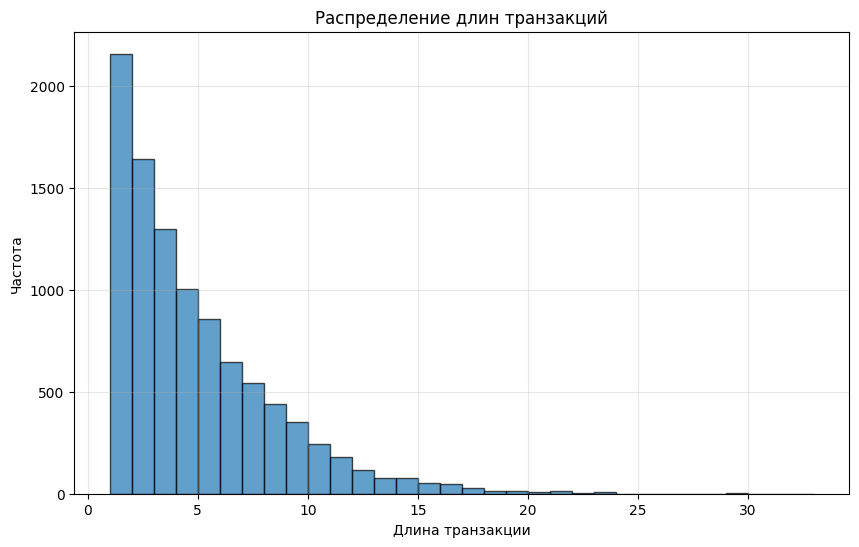

In [126]:
transaction_lengths = [len(transaction) for transaction in transactions]

print(f"Общее количество транзакций: {total_transactions}")
print(f"Минимальная длина: {min(transaction_lengths)}")
print(f"Максимальная длина: {max(transaction_lengths)}")
print(f"Средняя длина: {sum(transaction_lengths) / len(transaction_lengths):.2f}")

plt.figure(figsize=(10, 6))
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2), alpha=0.7, edgecolor='black')
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.grid(True, alpha=0.3)
plt.show()


**Список уникальных товаров**

In [127]:
all_items = [item for transaction in transactions for item in transaction]
unique_items = set(all_items)
print(f"Всего уникальных товаров: {len(unique_items)}")
print("Примеры товаров:", list(unique_items)[:10]) 

Всего уникальных товаров: 169
Примеры товаров: ['newspapers', 'rum', 'beef', 'pork', 'onions', 'misc. beverages', 'dog food', 'whipped/sour cream', 'root vegetables', 'waffles']


In [128]:
from collections import Counter
item_frequencies = Counter(all_items)
print(f"Топ-10 самых частых товаров:")
for item, count in item_frequencies.most_common(10):
    percentage = (count / total_transactions) * 100
    print(f"   - {item}: {count} раз ({percentage:.1f}%)")

Топ-10 самых частых товаров:
   - whole milk: 2513 раз (25.6%)
   - other vegetables: 1903 раз (19.3%)
   - rolls/buns: 1809 раз (18.4%)
   - soda: 1715 раз (17.4%)
   - yogurt: 1372 раз (14.0%)
   - bottled water: 1087 раз (11.1%)
   - root vegetables: 1072 раз (10.9%)
   - tropical fruit: 1032 раз (10.5%)
   - shopping bags: 969 раз (9.9%)
   - sausage: 924 раз (9.4%)


## Алгоритм Apriori

Параметры: 

- поддержка=0.002

- достоверность=0.13

In [129]:
df1 = apriori(data, min_support=0.002, use_colnames=True)
print(f"Найдено частых наборов: {len(df1)}")

rules = association_rules(df1, metric="confidence", min_threshold=0.13)
print(f"Найдено ассоциативных правил: {len(rules)}")

Найдено частых наборов: 4223
Найдено ассоциативных правил: 8168


Первые 10 ассоциативных правил:

In [130]:
for i in range(min(10, len(rules))):
    rule = rules.iloc[i]
    print(f"{i+1}. {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"   Поддержка: {rule['support']:.4f}, Достоверность: {rule['confidence']:.4f}, Лифт: {rule['lift']:.4f}")

1. {'Instant food products'} -> {'hamburger meat'}
   Поддержка: 0.0031, Достоверность: 0.3797, Лифт: 11.4214
2. {'Instant food products'} -> {'other vegetables'}
   Поддержка: 0.0027, Достоверность: 0.3418, Лифт: 1.7663
3. {'Instant food products'} -> {'rolls/buns'}
   Поддержка: 0.0023, Достоверность: 0.2911, Лифт: 1.5828
4. {'Instant food products'} -> {'whole milk'}
   Поддержка: 0.0031, Достоверность: 0.3797, Лифт: 1.4862
5. {'UHT-milk'} -> {'bottled water'}
   Поддержка: 0.0073, Достоверность: 0.2188, Лифт: 1.9801
6. {'UHT-milk'} -> {'citrus fruit'}
   Поддержка: 0.0046, Достоверность: 0.1368, Лифт: 1.6526
7. {'UHT-milk'} -> {'other vegetables'}
   Поддержка: 0.0081, Достоверность: 0.2432, Лифт: 1.2567
8. {'UHT-milk'} -> {'rolls/buns'}
   Поддержка: 0.0064, Достоверность: 0.1915, Лифт: 1.0411
9. {'UHT-milk'} -> {'root vegetables'}
   Поддержка: 0.0049, Достоверность: 0.1459, Лифт: 1.3385
10. {'UHT-milk'} -> {'shopping bags'}
   Поддержка: 0.0047, Достоверность: 0.1398, Лифт: 1.41

## Анализ полезных и тривиальных правил

- Анализ метрик

In [131]:
print(f"Количество правил: {len(rules)}")
print(f"Поддержка: min={rules['support'].min():.4f}, max={rules['support'].max():.4f}, mean={rules['support'].mean():.4f}")
print(f"Достоверность: min={rules['confidence'].min():.4f}, max={rules['confidence'].max():.4f}, mean={rules['confidence'].mean():.4f}")
print(f"Лифт: min={rules['lift'].min():.4f}, max={rules['lift'].max():.4f}, mean={rules['lift'].mean():.4f}")

Количество правил: 8168
Поддержка: min=0.0020, max=0.0748, mean=0.0040
Достоверность: min=0.1300, max=0.8857, mean=0.2999
Лифт: min=0.5441, max=11.5068, mean=2.5937


- Полезные правила (высокий лифт > 2)

In [132]:
useful_rules = rules[rules['lift'] > 2]
print(f"Найдено полезных правил: {len(useful_rules)}")

Найдено полезных правил: 5466


- Тривиальные правила (низкий лифт < 1.2)

In [133]:
trivial_rules = rules[rules['lift'] < 1.2]
print(f"Найдено тривиальных правил: {len(trivial_rules)}")

Найдено тривиальных правил: 320


- Правила с высокой достоверностью (> 0.6)

Найдено правил с высокой достоверностью: 367


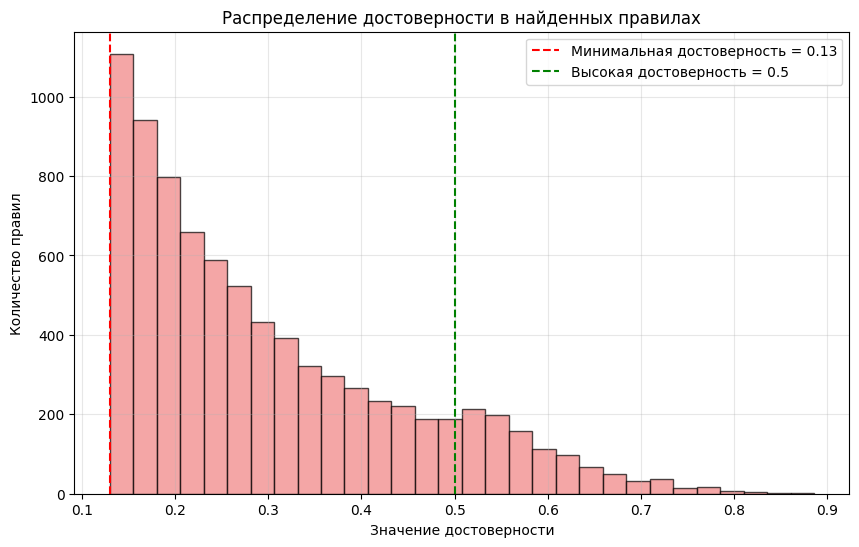

In [134]:
high_confidence_rules = rules[rules['confidence'] > 0.6]
print(f"Найдено правил с высокой достоверностью: {len(high_confidence_rules)}")

plt.figure(figsize=(10, 6))
plt.hist(rules['confidence'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.axvline(x=0.13, color='red', linestyle='--', label='Минимальная достоверность = 0.13')
plt.axvline(x=0.5, color='green', linestyle='--', label='Высокая достоверность = 0.5')
plt.xlabel('Значение достоверности')
plt.ylabel('Количество правил')
plt.title('Распределение достоверности в найденных правилах')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- Правила с высоким лифтом (> 3)

Найдено правил с высоким лифтом: 2187


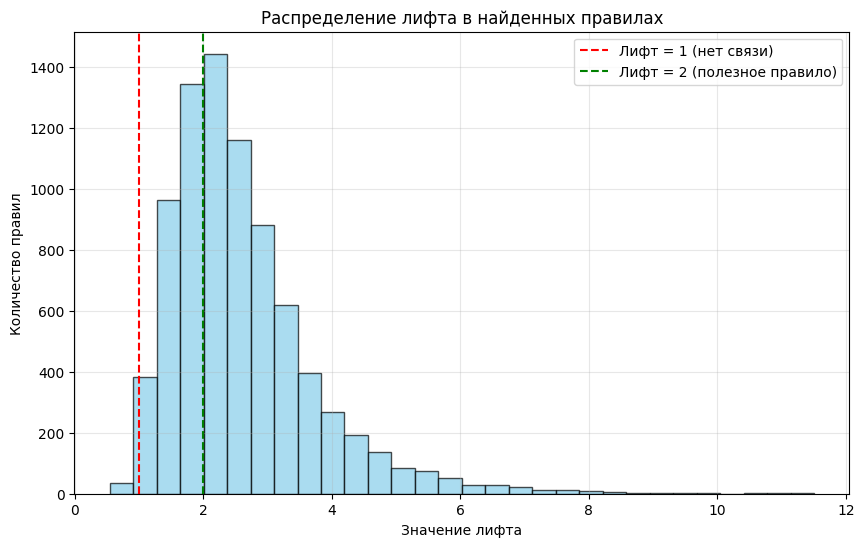

In [135]:

high_lift_rules = rules[rules['lift'] > 3]
print(f"Найдено правил с высоким лифтом: {len(high_lift_rules)}")

plt.figure(figsize=(10, 6))
plt.hist(rules['lift'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=1, color='red', linestyle='--', label='Лифт = 1 (нет связи)')
plt.axvline(x=2, color='green', linestyle='--', label='Лифт = 2 (полезное правило)')
plt.xlabel('Значение лифта')
plt.ylabel('Количество правил')
plt.title('Распределение лифта в найденных правилах')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Итоги
1. Всего найдено 8168 правил
2. Полезных правил: 5466 (66.9%), что свидетельствует о наличии значимых ассоциативных связей между товарами
3. Тривиальных правил: 320 (3.9%), что указывает на минимальное количество случайных совпадений
4. Правил с высокой достоверностью: 1030

## Оценка влияния параметров алгоритма на получаемые правила

In [136]:
print("1. ВЛИЯНИЕ МИНИМАЛЬНОЙ ПОДДЕРЖКИ (при достоверности=0.13):")
support_values = [0.001, 0.002, 0.005, 0.01]

for sup in support_values:
    frequent_itemsets = apriori(data, min_support=sup, use_colnames=True)
    rules_temp = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.13)
    
    if len(rules_temp) > 0:
        print(f"Поддержка {sup}: {len(rules_temp):5d} правил | "
              f"ср.лифт: {rules_temp['lift'].mean():.2f}")
    else:
        print(f"Поддержка {sup}: правил не найдено")

print("\n2. ВЛИЯНИЕ МИНИМАЛЬНОЙ ДОСТОВЕРНОСТИ (при поддержке=0.002):")
confidence_values = [0.1, 0.13, 0.2, 0.3]

for conf in confidence_values:
    rules_temp = association_rules(df1, metric="confidence", min_threshold=conf)
    
    if len(rules_temp) > 0:
        print(f"Достоверность {conf}: {len(rules_temp):5d} правил | "
              f"ср.лифт: {rules_temp['lift'].mean():.2f}")
    else:
        print(f"Достоверность {conf}: правил не найдено")

1. ВЛИЯНИЕ МИНИМАЛЬНОЙ ПОДДЕРЖКИ (при достоверности=0.13):
Поддержка 0.001: 36614 правил | ср.лифт: 3.57
Поддержка 0.002:  8168 правил | ср.лифт: 2.59
Поддержка 0.005:  1389 правил | ср.лифт: 2.03
Поддержка 0.01:   376 правил | ср.лифт: 1.76

2. ВЛИЯНИЕ МИНИМАЛЬНОЙ ДОСТОВЕРНОСТИ (при поддержке=0.002):
Достоверность 0.1:  9969 правил | ср.лифт: 2.58
Достоверность 0.13:  8168 правил | ср.лифт: 2.59
Достоверность 0.2:  5499 правил | ср.лифт: 2.61
Достоверность 0.3:  3228 правил | ср.лифт: 2.62


### Вывод:

Анализ показал увеличение поддержки с 0.001 до 0.01 сокращает количество правил с 36614 до 376, но снижает лифт с 3.57 до 1.76. Повышение достоверности с 0.1 до 0.3 уменьшает правила с 9969 до 3228 при незначительном росте лифта. Параметры поддержка=0.002 и достоверность=0.13 обеспечивают баланс: 8168 правил с лифтом 2.59."

## Алгоритм FPG

Параметры: 

- поддержка=0.002

- достоверность=0.13

In [164]:
df1_fp = fpgrowth(data, min_support=0.002, use_colnames=True)
print(f"Найдено частых наборов: {len(df1_fp)}")

# Генерация ассоциативных правил
rules_fp = association_rules(df1_fp, metric="confidence", min_threshold=0.13)
print(f"Найдено ассоциативных правил: {len(rules_fp)}")

Найдено частых наборов: 4223
Найдено ассоциативных правил: 8168


- Анализ правил

In [138]:
print(f"Поддержка: min={rules_fp['support'].min():.4f}, max={rules_fp['support'].max():.4f}, mean={rules_fp['support'].mean():.4f}")
print(f"Достоверность: min={rules_fp['confidence'].min():.4f}, max={rules_fp['confidence'].max():.4f}, mean={rules_fp['confidence'].mean():.4f}")
print(f"Лифт: min={rules_fp['lift'].min():.4f}, max={rules_fp['lift'].max():.4f}, mean={rules_fp['lift'].mean():.4f}")

useful_fp = rules_fp[rules_fp['lift'] > 2]
print(f"Полезных правил (лифт > 2): {len(useful_fp)} ({len(useful_fp)/len(rules_fp)*100:.1f}%)")

Поддержка: min=0.0051, max=0.0748, mean=0.0098
Достоверность: min=0.1300, max=0.7000, mean=0.2793
Лифт: min=0.7899, max=5.2124, mean=2.0273
Полезных правил (лифт > 2): 615 (44.3%)


- Примеры правил

In [139]:
print("\nТОП-5 СИЛЬНЫХ ПРАВИЛ FPG (по лифту):")
top_fp_rules = rules_fp.nlargest(5, 'lift')
for i, (idx, rule) in enumerate(top_fp_rules.iterrows()):
    print(f"{i+1}. {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"   Лифт: {rule['lift']:.4f} | Достоверность: {rule['confidence']:.4f} | Поддержка: {rule['support']:.4f}")


ТОП-5 СИЛЬНЫХ ПРАВИЛ FPG (по лифту):
1. {'tropical fruit', 'whole milk'} -> {'yogurt', 'root vegetables'}
   Лифт: 5.2124 | Достоверность: 0.1346 | Поддержка: 0.0057
2. {'yogurt', 'root vegetables'} -> {'tropical fruit', 'whole milk'}
   Лифт: 5.2124 | Достоверность: 0.2205 | Поддержка: 0.0057
3. {'tropical fruit', 'root vegetables'} -> {'yogurt', 'whole milk'}
   Лифт: 4.8288 | Достоверность: 0.2705 | Поддержка: 0.0057
4. {'pip fruit', 'root vegetables'} -> {'whole milk', 'other vegetables'}
   Лифт: 4.7163 | Достоверность: 0.3529 | Поддержка: 0.0055
5. {'ham'} -> {'white bread'}
   Лифт: 4.6399 | Достоверность: 0.1953 | Поддержка: 0.0051


### Примеры правил

1. При покупке тропических фруктов и молока с вероятностью 13.5% также покупают йогурт и корнеплоды.

2. При покупке йогурта и корнеплодов с вероятностью 22.1% также покупают тропические фрукты и молоко.

3. При покупке тропических фруктов и корнеплодов с вероятностью 27.1% также покупают йогурт и молоко.

4. При покупке косточковых фруктов и корнеплодов с вероятностью 35.3% также покупают молоко и другие овощи. 

5. При покупке ветчины с вероятностью 19.5% также покупают белый хлеб.

### Минимальные значения поддержки для составления правил из 1, 2, 3, 4 объектов в алгоритме Apriori.

In [140]:
support_values = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03]
results = []

for sup in support_values:
    frequent_itemsets = apriori(data, min_support=sup, use_colnames=True)
    
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    
    max_length = frequent_itemsets['length'].max()
    rules_count = {}
    
    for length in range(1, max_length + 1):
        count = len(frequent_itemsets[frequent_itemsets['length'] == length])
        rules_count[length] = count
    
    results.append({
        'support': sup,
        'max_length': max_length,
        'rules_by_length': rules_count,
        'total_itemsets': len(frequent_itemsets)
    })


print("\nМинимальная подержка для наборов разного размера:")
print("Поддержка | Макс.размер | Наборы из 1 | Наборы из 2 | Наборы из 3 | Наборы из 4 | Всего")
print("-" * 90)

for result in results:
    rules = result['rules_by_length']
    print(f"{result['support']:9.3f} | {result['max_length']:11} | "
          f"{rules.get(1, 0):11} | {rules.get(2, 0):11} | {rules.get(3, 0):11} | "
          f"{rules.get(4, 0):11} | {result['total_itemsets']:5}")


Минимальная подержка для наборов разного размера:
Поддержка | Макс.размер | Наборы из 1 | Наборы из 2 | Наборы из 3 | Наборы из 4 | Всего
------------------------------------------------------------------------------------------
    0.001 |           6 |         157 |        2981 |        6831 |        3137 | 13492
    0.002 |           5 |         147 |        1674 |        1991 |         395 |  4223
    0.005 |           4 |         120 |         605 |         264 |          12 |  1001
    0.010 |           3 |          88 |         213 |          32 |           0 |   333
    0.020 |           3 |          59 |          61 |           2 |           0 |   122
    0.030 |           2 |          44 |          19 |           0 |           0 |    63


### Изменение параметров Apriori

Комбинации параметров:

(0.01, 0.2)   высокая поддержка, средняя достоверность

(0.005, 0.13)  средняя поддержка, низкая достоверность

(0.005, 0.3)  средняя поддержка, высокая достоверность

(0.002, 0.1)   низкая поддержка, низкая достоверность

(0.002, 0.2)   низкая поддержка, средняя достоверность



In [141]:
param_combinations = [
    (0.01, 0.2),   
    (0.01, 0.4),     
    (0.005, 0.13), 
    (0.005, 0.3),  
    (0.002, 0.1),  
    (0.002, 0.2)   
]

for i, (min_sup, min_conf) in enumerate(param_combinations, 1):
    print(f"\n{i}. ПАРАМЕТРЫ: поддержка={min_sup}, достоверность={min_conf}")
    
    frequent_itemsets = apriori(data, min_support=min_sup, use_colnames=True)
    rules_temp = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    
    print(f"   Результаты: {len(rules_temp)} правил")    


1. ПАРАМЕТРЫ: поддержка=0.01, достоверность=0.2
   Результаты: 234 правил

2. ПАРАМЕТРЫ: поддержка=0.01, достоверность=0.4
   Результаты: 62 правил

3. ПАРАМЕТРЫ: поддержка=0.005, достоверность=0.13
   Результаты: 1389 правил

4. ПАРАМЕТРЫ: поддержка=0.005, достоверность=0.3
   Результаты: 487 правил

5. ПАРАМЕТРЫ: поддержка=0.002, достоверность=0.1
   Результаты: 9969 правил

6. ПАРАМЕТРЫ: поддержка=0.002, достоверность=0.2
   Результаты: 5499 правил


### Вывод:

- Эксперименты показали снижение поддержки с 0.01 до 0.002 увеличивает количество правил с 234 до 9969. 

- Повышение достоверности с 0.1 до 0.4 сокращает правила в 3-4 раза. 

- Оптимальные значения - поддержка 0.005 и достоверность 0.13 (1389 правил)

### Граф
Для визуализации взято топ-10 правил по лифту.

Диапазон лифта: от 3.50 до 5.21.

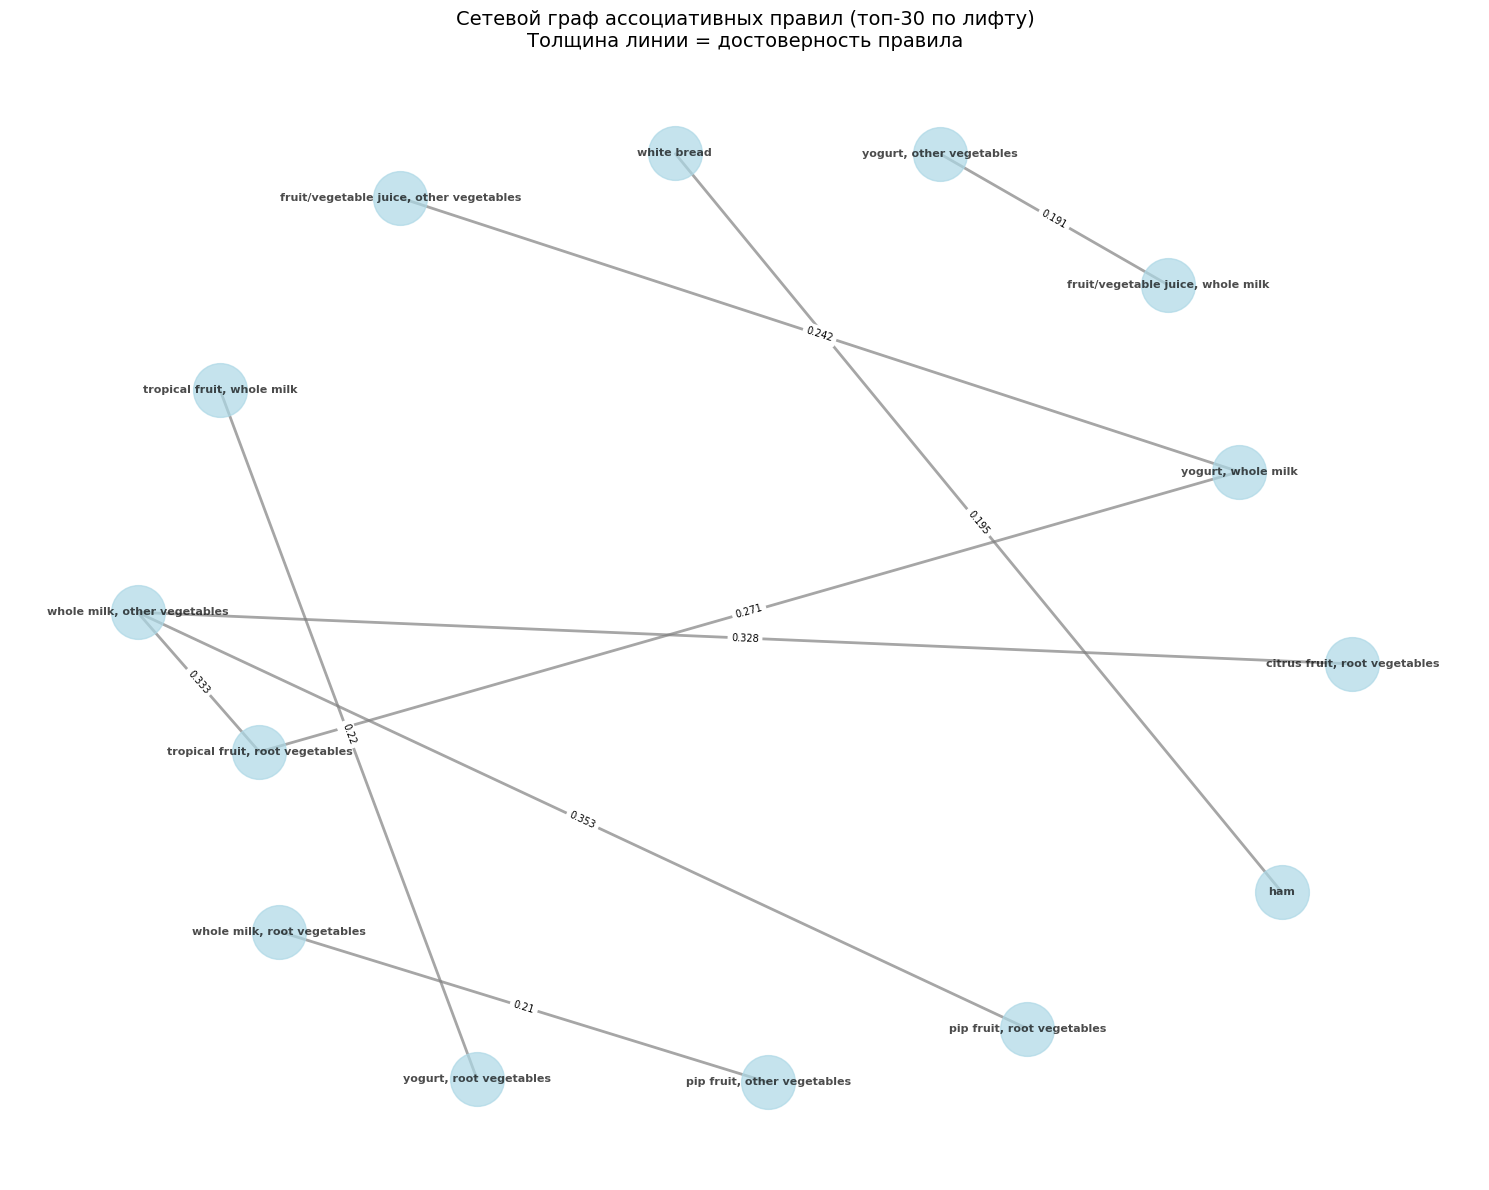

In [161]:
frequent_itemsets = apriori(data, min_support=0.005, use_colnames=True)
rules_for_graph = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.13)

top_rules_for_graph = rules_for_graph.nlargest(10, 'lift')

G = nx.Graph()
top_rules_for_graph['antecedents_str'] = top_rules_for_graph['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules_for_graph['consequents_str'] = top_rules_for_graph['consequents'].apply(lambda x: ', '.join(list(x)))
for product in top_rules_for_graph["antecedents_str"]:
    G.add_node(product)
for product in top_rules_for_graph["consequents_str"]:
    G.add_node(product)
for index, row in top_rules_for_graph.iterrows():
    G.add_edge(row['antecedents_str'], row['consequents_str'], weight=row['confidence'])

fig, ax = plt.subplots(figsize=(15, 12))
pos = nx.spring_layout(G, k=2, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', 
        font_size=8, font_weight='bold', edge_color='gray', alpha=0.7,
        edge_cmap=plt.cm.Blues, width=2, ax=ax)

edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels_rounded = {k: round(v, 3) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_rounded, font_size=7, ax=ax)

plt.title('Сетевой граф ассоциативных правил (топ-30 по лифту)\nТолщина линии = достоверность правила', fontsize=14)
plt.tight_layout()
plt.show()

1. Структура ассоциативных связий:

In [153]:
print(f"""
   - Граф содержит {G.number_of_nodes()} узлов (товаров/наборов товаров)
   - Общее количество связей: {G.number_of_edges()} ассоциативных правил
   - Каждое ребро представляет правило вида "если X, то Y """)


   - Граф содержит 31 узлов (товаров/наборов товаров)
   - Общее количество связей: 26 ассоциативных правил
   - Каждое ребро представляет правило вида "если X, то Y 


2. Ключевые товары (центральные узлы)

In [156]:
degree_centrality = nx.degree_centrality(G)
top_central = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for product, centrality in top_central:
    connections = int(centrality * (G.number_of_nodes()-1))
    print(f"   - {product}: связан с {connections} другими товарами")
    print(f"     Это indicates, что данный товар часто встречается в различных")
    print(f"     ассоциативных правилах и является ключевым в покупательских корзинах")


   - whole milk, other vegetables: связан с 5 другими товарами
     Это indicates, что данный товар часто встречается в различных
     ассоциативных правилах и является ключевым в покупательских корзинах
   - yogurt, other vegetables: связан с 4 другими товарами
     Это indicates, что данный товар часто встречается в различных
     ассоциативных правилах и является ключевым в покупательских корзинах
   - whole milk, root vegetables: связан с 4 другими товарами
     Это indicates, что данный товар часто встречается в различных
     ассоциативных правилах и является ключевым в покупательских корзинах
   - yogurt, whole milk: связан с 3 другими товарами
     Это indicates, что данный товар часто встречается в различных
     ассоциативных правилах и является ключевым в покупательских корзинах
   - root vegetables, other vegetables: связан с 3 другими товарами
     Это indicates, что данный товар часто встречается в различных
     ассоциативных правилах и является ключевым в покупательских

3. Надёжность правил (толщина ребер)

In [157]:
strong_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:5]
for edge in strong_edges:
    print(f"   - {edge[0]} ↔ {edge[1]}: достоверность {edge[2]['weight']:.3f}")
    print(f"     Это означает, что при покупке левой части правила с вероятностью")
    print(f"     {edge[2]['weight']:.1%} покупают и правую часть")

   - citrus fruit, whole milk, other vegetables ↔ root vegetables: достоверность 0.445
     Это означает, что при покупке левой части правила с вероятностью
     44.5% покупают и правую часть
   - herbs ↔ root vegetables: достоверность 0.431
     Это означает, что при покупке левой части правила с вероятностью
     43.1% покупают и правую часть
   - citrus fruit, pip fruit ↔ tropical fruit: достоверность 0.404
     Это означает, что при покупке левой части правила с вероятностью
     40.4% покупают и правую часть
   - pip fruit, root vegetables ↔ whole milk, other vegetables: достоверность 0.353
     Это означает, что при покупке левой части правила с вероятностью
     35.3% покупают и правую часть
   - tropical fruit, root vegetables ↔ whole milk, other vegetables: достоверность 0.333
     Это означает, что при покупке левой части правила с вероятностью
     33.3% покупают и правую часть


### Собственный способ визуализации:

#### Bubble chart

- Ось X: Достоверность
- Ось Y: Лифт 
- Размер пузырька: Поддержка
- Цвет пузырька: Лифт

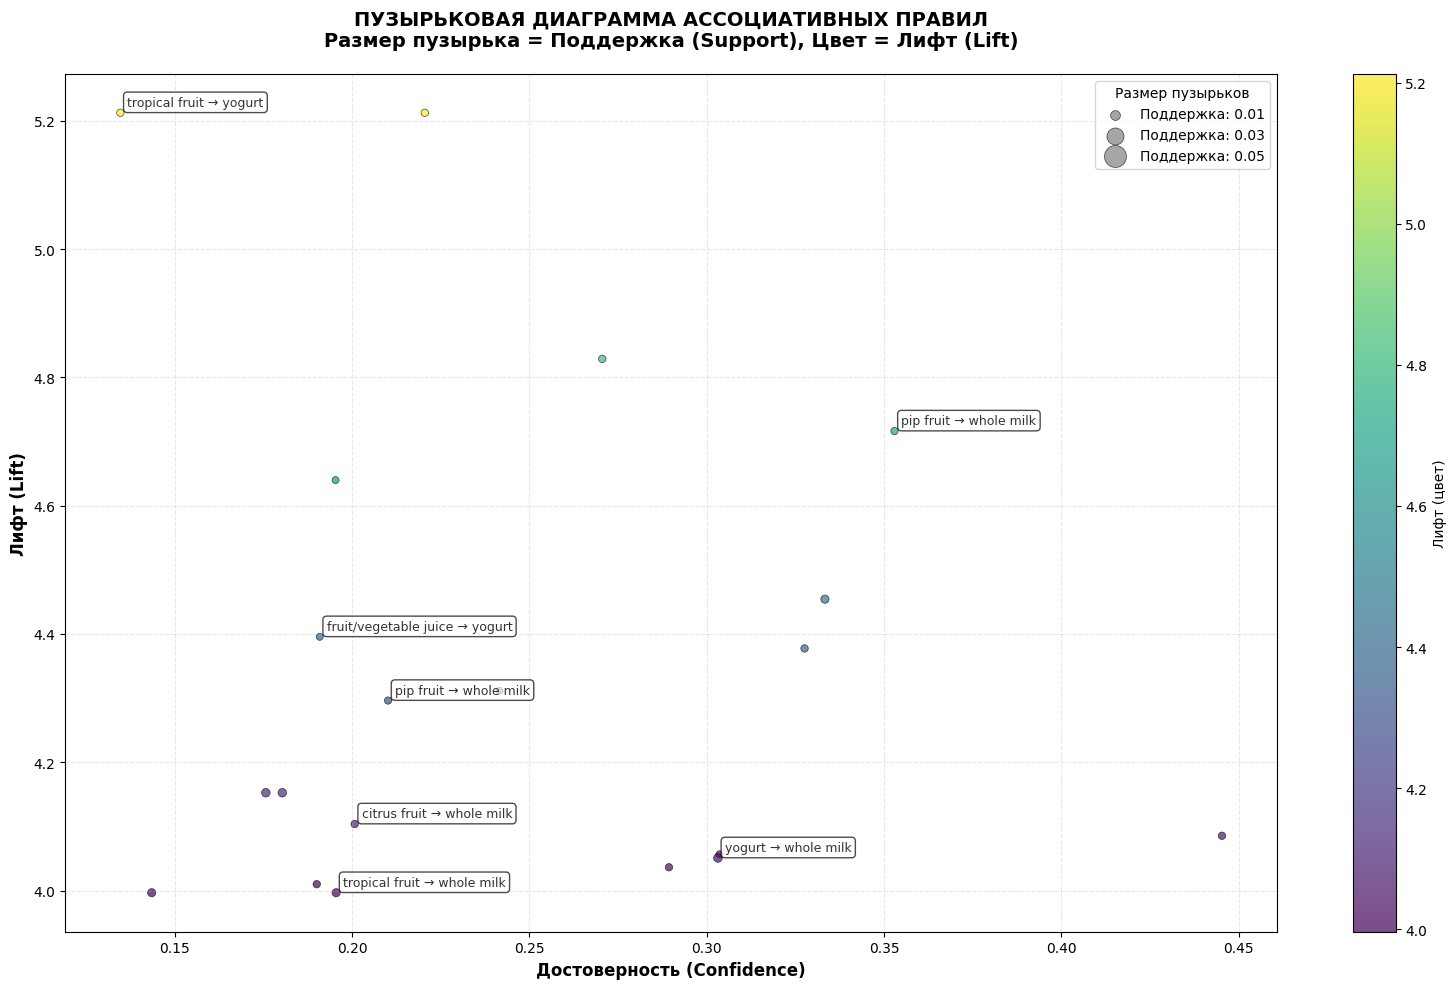

In [162]:
top_20_rules = rules_for_graph.nlargest(20, 'lift').copy()

top_20_rules['rule_short'] = top_20_rules.apply(
    lambda x: f"{list(x['antecedents'])[0]} → {list(x['consequents'])[0]}", 
    axis=1
)

plt.figure(figsize=(16, 10))


scatter = plt.scatter(
    x=top_20_rules['confidence'],   
    y=top_20_rules['lift'],           
    s=top_20_rules['support'] * 5000, 
    c=top_20_rules['lift'],          
    cmap='viridis',
    alpha=0.7,
    edgecolors='black',
    linewidth=0.5
)

for i, (idx, rule) in enumerate(top_20_rules.iterrows()):
    if i % 3 == 0:  
        plt.annotate(
            rule['rule_short'],
            (rule['confidence'], rule['lift']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=9,
            alpha=0.8,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
        )

plt.colorbar(scatter, label='Лифт (цвет)')
plt.xlabel('Достоверность (Confidence)', fontsize=12, fontweight='bold')
plt.ylabel('Лифт (Lift)', fontsize=12, fontweight='bold')
plt.title('ПУЗЫРЬКОВАЯ ДИАГРАММА АССОЦИАТИВНЫХ ПРАВИЛ\n'
          'Размер пузырька = Поддержка (Support), Цвет = Лифт (Lift)', 
          fontsize=14, fontweight='bold', pad=20)

plt.grid(True, alpha=0.3, linestyle='--')

legend_sizes = [0.01, 0.03, 0.05]
for size in legend_sizes:
    plt.scatter([], [], s=size * 5000, c='gray', alpha=0.7, 
                edgecolors='black', linewidth=0.5, label=f'Поддержка: {size}')

plt.legend(title='Размер пузырьков', loc='upper right', framealpha=0.8)

plt.tight_layout()
plt.show()

### Заключение

В ходе работы были исследованы алгоритмы Apriori и FPGrowth для анализа ассоциативных правил. Выявлены устойчивые связи между товарами, определены оптимальные параметры алгоритмов. Разработанная пузырьковая диаграмма обеспечила эффективную визуализацию результатов.